In [2]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

data = pandas.read_csv("ukol_04_data.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
import numpy

y = data["y"]

categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "campaign", "poutcome"]
numeric_columns = ["age", "balance", "duration", "pdays", "previous"]
numeric_data = data[numeric_columns].to_numpy()

encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

X = numpy.concatenate([encoded_columns, numeric_data], axis=1)
X


array([[  0.,   0.,   0., ..., 261.,  -1.,   0.],
       [  0.,   0.,   0., ..., 151.,  -1.,   0.],
       [  0.,   0.,   1., ...,  76.,  -1.,   0.],
       ...,
       [  0.,   0.,   0., ..., 151.,  -1.,   0.],
       [  0.,   1.,   0., ..., 129., 211.,   3.],
       [  0.,   0.,   1., ..., 345., 249.,   7.]])

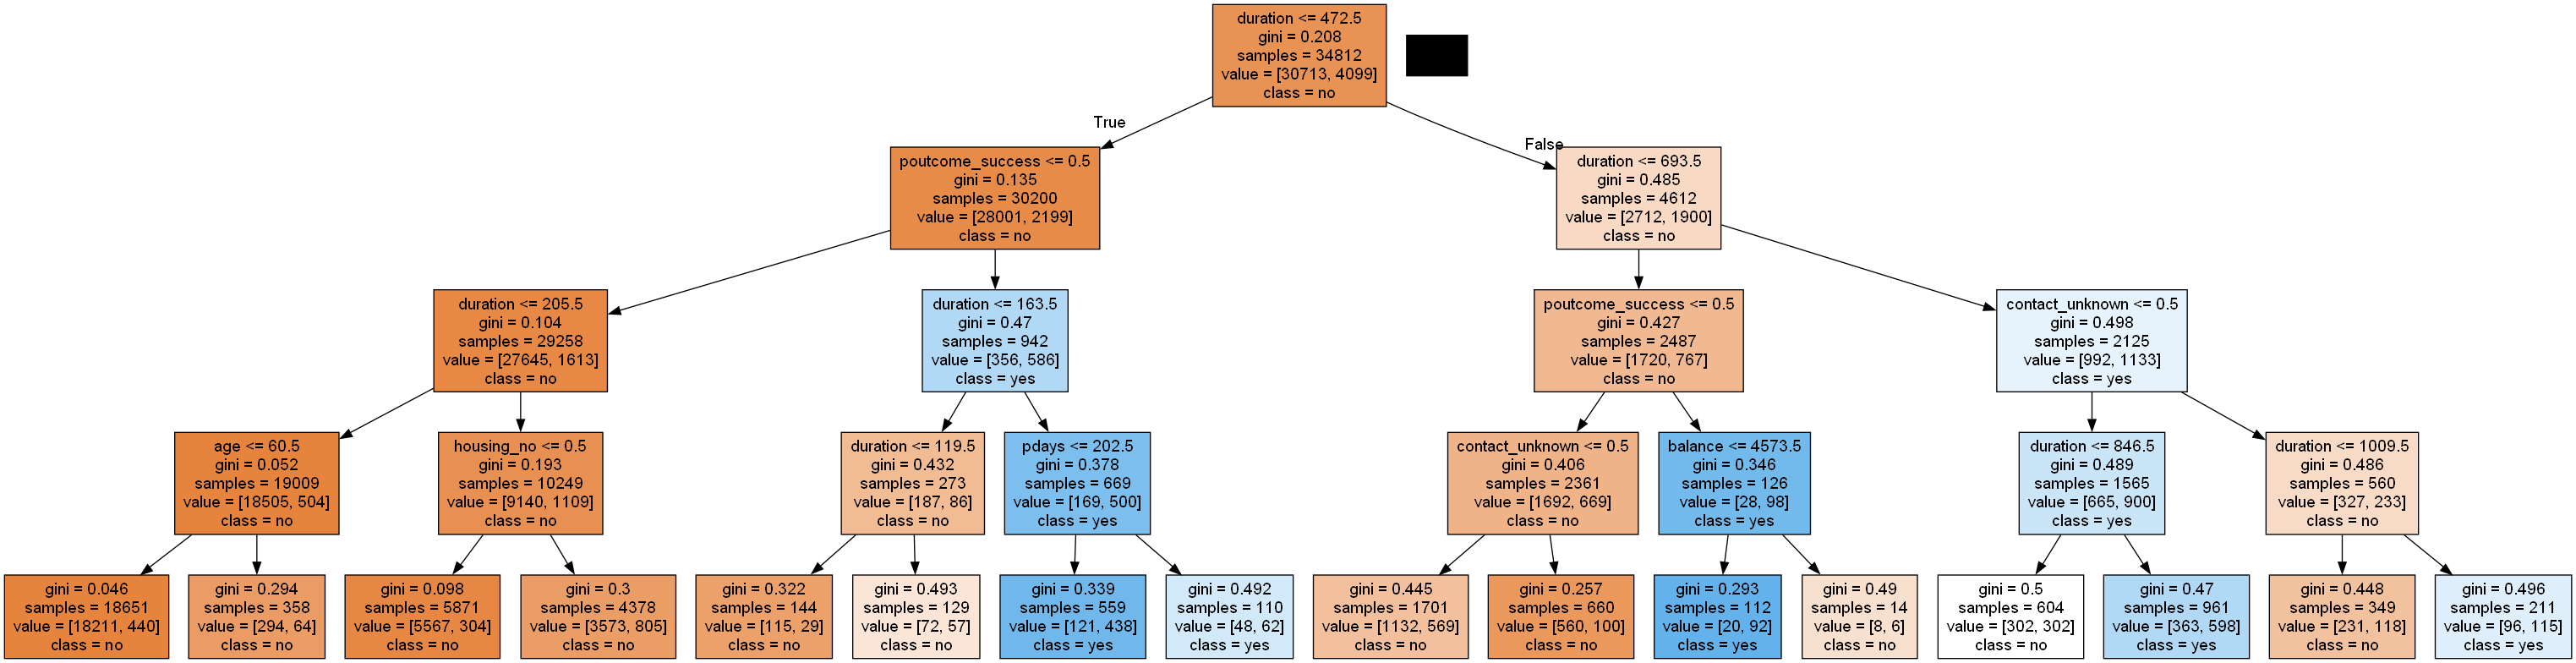

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, feature_names=list(encoder.get_feature_names_out()) + numeric_columns, class_names=["no", "yes"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


Vytvoř matici záměn a urči výši metriky accuracy.

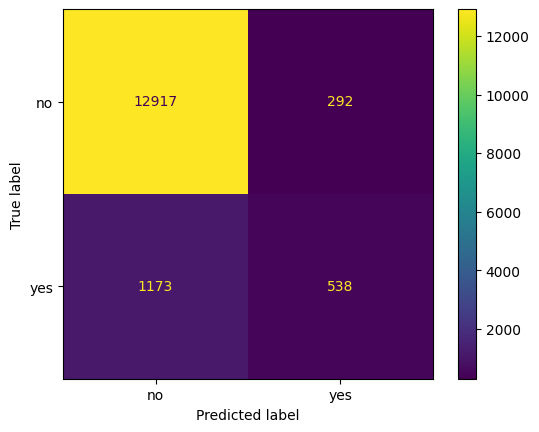

In [5]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)


In [6]:
scaler = StandardScaler()
numeric_data = scaler.fit_transform(data[numeric_columns])

encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

X = numpy.concatenate([encoded_columns, numeric_data], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [7]:
accuracy_score(y_test, y_pred)

0.9018096514745308

Vedení marketingového oddělení se chce vyhnout zbytečnému kontaktování klientů, kteří o termínovaný účet nemají zájem. Nevadí, pokud se neozvou někomu, kdo o termínovaný vklad zájem má.
precision_score - metrika penalizuje označení špatného za dobré. 

In [8]:
precision_score(y_test, y_pred, pos_label="yes")


0.6481927710843374

Využij algoritmus K Nearest Neighbours k predikci, zda si klient/klientka založí termínovaný účet. Využij všechny vstupní proměnné, s výjimkou proměnných day a month. Kategoriální proměnné uprav pomocí OneHotEncoder (tj. stejně jako u rozhodovacího stormu). Na číselné proměnné tentokrát použij StandardScaler. Pomocí cyklu (nebo pomocí GridSearchCV) urči počet uvažovaných sousedů, které algoritmus bere v úvahu. Uvažuj následující hodnoty parametru: 3, 7, 11, 15, 19, 23. Jaká je nejlepší hodnota metriky? A je lepší než u rozhodovacího stromu?

In [13]:
y = data["y"]

categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "campaign", "poutcome"]
numeric_columns = ["age", "balance", "duration", "pdays", "previous"]
numeric_data = data[numeric_columns].to_numpy()

encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()


In [14]:
scaler = StandardScaler()
numeric_data = scaler.fit_transform(data[numeric_columns])

X = numpy.concatenate([encoded_columns, numeric_data], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
model_1 = KNeighborsClassifier()
params_1 = {"n_neighbors": range(1, 31, 2)}

clf_1 = GridSearchCV(model_1, params_1, scoring="accuracy")
clf_1.fit(X, y)

print(clf_1.best_params_)
print(round(clf_1.best_score_, 2))


{'n_neighbors': 25}
0.88


Jako druhý využij algoritmus Support Vector Machine. Využij lineární verzi, tj. LinearSVC. Algoritmus využij s výchozími hodnotami parametrů, tj. nemusíš zkoušet různé hodnoty parametrů. Vypočti hodnotu požadované metriky.

In [17]:
from sklearn.svm import LinearSVC, SVC

model_2 = SVC(kernel="linear")
params_2 = {"decision_function_shape": ["ovo", "ovr"]}

clf_2 = GridSearchCV(model_2, params_2, scoring="accuracy")
clf_2.fit(X, y)

print(clf_2.best_params_)
print(round(clf_2.best_score_, 2))



{'decision_function_shape': 'ovo'}
0.89


Porovnej hodnoty metrik pro rozhodovací strom, K Nearest Neighbours a Support Vector Machine. Ve kterém z bodů jsme dosáhli nejvyšší hodnoty metriky?

Rozhodovací strom - 0.90

Bonus: Pomocí cyklu vyzkoušej další možné výšky rozhodovacího stromu, například v rozmezí 5 až 12.

In [18]:
model_3 = DecisionTreeClassifier()
params_3 = {"max_depth": [5, 6, 7, 8, 9, 10, 11, 12]}

clf_3 = GridSearchCV(model_3, params_3, scoring="accuracy")
clf_3.fit(X, y)

print(clf_3.best_params_)
print(clf_3.best_score_)


{'max_depth': 5}
0.8799960684448814
